# [Visão Computacional](https://denmartins.github.io/teaching/2025-visao-computacional)

## Redes Neurais para Classificação de imagens

### [Prof. Dr. Denis Mayr Lima Martins](https://denmartins.github.io/)

### [Pontifícia Universidade Católica de Campinas](https://www.puc-campinas.edu.br/)

<img src="https://www.puc-campinas.edu.br/wp-content/uploads/2022/06/logo-puc.png" width="100px"/>


## Objetivos de Aprendizagem
---

-  Compreender a estrutura e funcionamento do perceptron clássico, incluindo sua relação com a função logística.
-  Analisar o Multi‑Layer Perceptron (MLP) como extensão do perceptron, destacando camadas ocultas, funções de ativação não‑lineares e topologia geral.
-  Descrever o algoritmo de treinamento baseado em *back‑propagation* e a otimização de pesos via gradiente descendente.
-  Compreender estratégias de validação cruzada (k‑fold) para avaliação robusta de modelos.
-  Discutir os conceitos de viés e variância, suas implicações na generalização e estratégias de mitigação.
-  Entender métodos de regularização (L1/L2, dropout) e suas aplicações práticas em redes neurais.

## Neurônio Artificial
---

<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:center;border:none;width:30%;">
<img src='https://historyofinformation.com/images/Screen_Shot_2020-09-09_at_6.46.46_AM_big.png' style="width:300px;"/>
    <span style='display:block;'>Warren McCulloch e Walter Pitts. Criadores do primeiro modelo de neurônio artificial (1943). Fonte: <a href="https://www.historyofinformation.com/detail.php?entryid=782" target="_blank">History of Information</a>.</span>
</td>
<td style="vertical-align:middle;text-align:center;border:none;width:65%;">
<img src='https://miro.medium.com/v2/resize:fit:2902/1*hkYlTODpjJgo32DoCOWN5w.png' style="width:100%;"/>
    <span style='display:block;'>Neurônio Artificial. Fonte: <a href="https://medium.com/@mullatahseen_786/understanding-the-perceptron-foundations-of-neural-networks-in-deep-learning-b1b5e98c6657" target="_blank">Tahseen Mulla</a>.</span>
</td>
</tr>
</table>
</center>


## Perceptron
---

<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:40%;">

- Primeira máquina capaz de aprender a partir de dados.
- Consiste em um conjunto de pesos $\mathbf{w}\in\mathbb{R}^{m}$ associados às $m$ características (*features*) de entrada $\mathbf{x}$
- Computa uma saída $z=\mathbf{w}^{T}\mathbf{x}+b$, onde $b$ é um viés escalar. 
- Aplica uma função de ativação $\sigma$ que transforma $z$.
$$
\sigma(z) = \begin{cases} 
      0 & z\leq 0 \\
      1 & z \gt 0 
   \end{cases}
$$ 
</td>
<td style="vertical-align:middle;text-align:center;border:none;">
<img src="https://github.com/rasbt/machine-learning-book/blob/main/ch02/figures/02_04.png?raw=true" width="600">
 <span style='display:block;'>Visão Geral do Perceptron. Image Source: <a href="https://github.com/rasbt/machine-learning-book/blob/main/ch02/figures/02_04.png" target="_blank">Sebastian Raschka</a>.</span>
</td>
</tr>
</table>
</center>




## Perceptron Learning Rule

- Dado um exemplo $(\mathbf{x},y)$, onde $y\in\{0,1\}$ é o rótulo verdadeiro, calcula‑se a predição $\hat{y}=f(z)$. 
- Se a predição estiver incorreta ($e=y-\hat{y}\neq 0$), os pesos e viés são ajustados na direção que reduz o erro. 
- $\mathbf{w}\leftarrow\mathbf{w}+\eta\,e\,\mathbf{x}$ e $b\leftarrow b+\eta\,e$, onde $\eta>0$ é a taxa de aprendizado. 
<!-- - Itera sobre o conjunto de treinamento até que todas as amostras sejam classificadas corretamente ou um número máximo de épocas seja atingido. -->

<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:50%;">

```
Inicializa w ← 0, b ← 0
para cada época até convergência:
    para cada (x, d) em D:
        z   ← w·x + b
        ŷ  ← (z ≥ 0) ? 1 : 0          // passo unitário
        se ŷ ≠ d então                // erro de classificação
            w ← w + η(d - ŷ)x
            b ← b + η(d - ŷ)
        fim se
    fim para
fim para
```

</td>
<td style="vertical-align:middle;text-align:center;border:none;width:50%;">
<img src="https://perceptrondemo.com/assets/rosenblatt-wiring-perceptron-940c6e47.jpg" width="220px">
 <span style='display:block;'>Frank Rosenblatt em 1960 conectando o Mark 1 Perceptron. Fonte: <a href="https://perceptrondemo.com/" target="_blank">Perceptron Demo</a>.</span>
</td>
</tr>
</table>
</center>




## Perceptron em Pytorch: Demo
---

In [1]:
# Preparação dos plots
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set global matplotlib parameters
mpl.rcParams['lines.linewidth'] = 1.2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['font.size'] = 12

# Remove plot edges
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'y'
mpl.rcParams['grid.alpha'] = 0.3

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

In [3]:
X, y = make_classification(
    n_samples=100, 
    n_classes=2,
    n_features=2, 
    n_clusters_per_class=1, 
    n_informative=2,
    n_redundant=0,
    class_sep=1.2, 
    random_state=123)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=123)

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test  = std_scaler.transform(X_test)

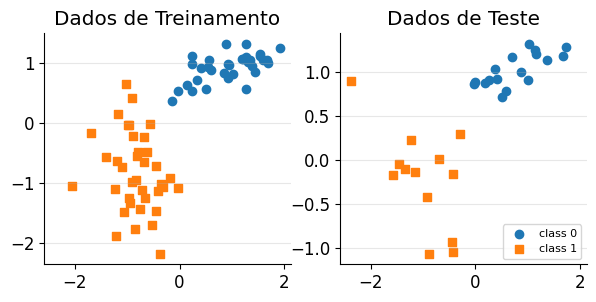

In [4]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].scatter(
    X_train[y_train==0, 0], 
    X_train[y_train==0, 1], 
    label='class 0', 
    marker='o')
ax[0].scatter(
    X_train[y_train==1, 0], 
    X_train[y_train==1, 1], 
    label='class 1', 
    marker='s')
ax[0].set_title("Dados de Treinamento")

ax[1].scatter(
    X_test[y_test==0, 0], 
    X_test[y_test==0, 1], 
    label='class 0', 
    marker='o')
ax[1].scatter(
    X_test[y_test==1, 0], 
    X_test[y_test==1, 1], 
    label='class 1', 
    marker='s')

ax[1].set_title("Dados de Teste")
ax[1].legend(loc='lower right', fontsize=8)
plt.show()

### Perceptron em Pytorch
---

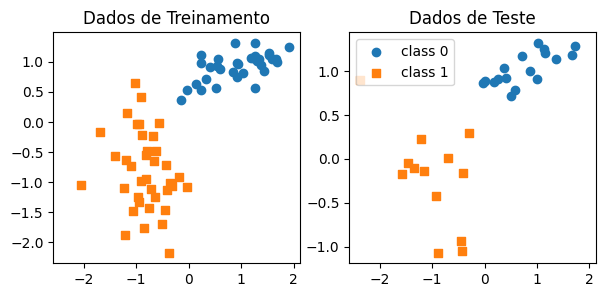

In [5]:
def set_device(on_gpu=True):
    has_mps = torch.backends.mps.is_available()
    has_cuda = torch.cuda.is_available()
    return "mps" if (has_mps and on_gpu) \
            else "cuda" if (has_cuda and on_gpu) \
            else "cpu"

device = set_device(on_gpu=True)

In [6]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(
            num_features, 1, dtype=torch.float32, device=device)
        self.bias  = torch.zeros(1, dtype=torch.float32, device=device)
        self.ones  = torch.ones(1, device=device) 
        self.zeros = torch.zeros(1, device=device)

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for _ in range(epochs):
            for i in range(y.shape[0]):
                errors = self.backward(
                    x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

### Treinando o Modelo
---

In [7]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(
    X_train, 
    dtype=torch.float32, 
    device=device)
y_train_tensor = torch.tensor(
    y_train, 
    dtype=torch.float32, 
    device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Model parameters:')
print('\tWeights:', ppn.weights.tolist())
print('\tBias: ', ppn.bias.tolist())

Model parameters:
	Weights: [[-1.0376710891723633], [-1.455593466758728]]
	Bias:  [0.0]


### Avaliando o Modelo nos dados de Teste
---

In [8]:
X_test_tensor = torch.tensor(
    X_test, 
    dtype=torch.float32, 
    device=device)
y_test_tensor = torch.tensor(
    y_test, 
    dtype=torch.float32, 
    device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print(f'Test set accuracy: {(test_acc*100):.2f}%')

Test set accuracy: 96.67%


### Visualizando a Fronteira de Decisão
---

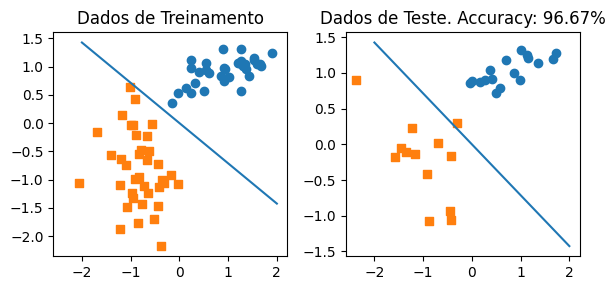

In [9]:
w, b = ppn.weights.cpu(), ppn.bias.cpu()

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0]) 
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0]) 
          / w[1] )

/Users/denismartins/.local/share/virtualenvs/hypernn-G_MaMKSj/lib/python3.11/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/Users/denismartins/.local/share/virtualenvs/hypernn-G_MaMKSj/lib/python3.11/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarr

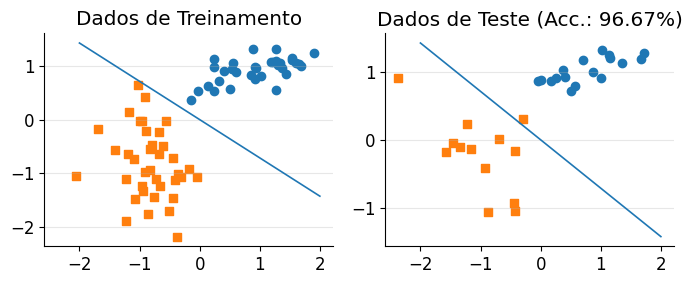

In [10]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
              label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
              label='class 1', marker='s')
ax[0].set_title("Dados de Treinamento")

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], 
    label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], 
              label='class 1', marker='s')

ax[1].set_title(f"Dados de Teste (Acc.: {test_acc*100:.2f}%)")
plt.tight_layout()
plt.show()

## Perceptron é um modelo flexível
---



<div style='align: left; text-align:center;'>
    <img src='https://paper-attachments.dropbox.com/s_2E4854D97CFCA11CB3874DE15FA048AD21CE628C357A5C14D6A303FEC847FA36_1596967818835_image.png' alt='Perceptrons' style="width:400px;"/>
    <span style='display:block;'>Perceptrons em outros modelos. Fonte: <a href="https://trokas.github.io/ai_primer/DNN.html" target="_blank"> AI primer by Trokas</a>.</span>
    <br/>
</div>

## Adaline: Adaptive Linear Neuron
---

<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:45%;">

- Introduzido por Widrow e Hoff em 1960.
- Função de ativação linear $\sigma$.
- Função de custo é o MSE $\mathcal{L}(w,b) = \frac{1}{m} \sum^m_{i=1} (y^i - \sigma(z^i))^2$.
- Perceptron aprimorado: treinamento busca minimizar o MSE em vez de simplesmente corrigir classificações incorretas. 
- $\sigma$ linear permite o gradiente do erro seja calculado de forma contínua.
- $\sigma$ é convexa, permitindo usar o algoritmo de otimização **gradiente descente**.
</td>
<td style="vertical-align:middle;text-align:center;border:none;width:45%;">
<img src="https://github.com/rasbt/machine-learning-book/blob/main/ch11/figures/11_01.png?raw=true" width="600">
 <span style='display:block;'>Adaline. Image Source: <a href="https://github.com/rasbt/machine-learning-book/tree/main" target="_blank">Sebastian Raschka</a>.</span>
</td>
</tr>
</table>
</center>





## Gradiente Descendente
---

Atualização de parâmetros do modelo utilizando informação do gradiente de uma função de custo (*loss*) $\mathcal{L}(w,b)$: $\nabla(\mathcal{L}(w,b))$. 

Ou seja, dar um passo na direção oposta do gradiente.
$$\Delta w = - \eta \times \nabla_w(\mathcal{L}(w,b))$$
$$\Delta b = - \eta \times \nabla_b(\mathcal{L}(w,b))$$
- $\eta$: learning rate (tamanho do passo)
Gradiente da função de custo com respeito a $w_j$ e a $b$:

$$\frac{\partial \mathcal{L}}{\partial w_j} = - \frac{1}{m} \sum_i (y^i - \sigma(z^i))x^i_j$$

$$\frac{\partial \mathcal{L}}{\partial b} = - \frac{1}{m} \sum_i (y^i - \sigma(z^i))$$


## Gradiente Descendente (cont.)
---

Podemos escrever a atualização de *weights* e *bias* como:

- $\Delta w_j = - \eta (\frac{\partial \mathcal{L}}{\partial w_j})$
- $\Delta b = - \eta (\frac{\partial \mathcal{L}}{\partial b)}$

Usamos um algoritmo para computar gradientes com base no conjunto completo de dados de treinamento e atualizar os parâmetros do modelo. Essa atualização se dá realizando um pequeno passo na direção oposta do gradiente da *loss* $\Delta \mathcal{L}(w,b)$.  


## Gradiente Descendente
---

<div style='align: left; text-align:center;'>
    <img src='https://media.licdn.com/dms/image/D5612AQHEVVxj-OS1og/article-cover_image-shrink_720_1280/0/1695927263310?e=2147483647&v=beta&t=XHFLMNaRVcMTx_EG8twpMJeZNf5dgINmbXmYLzBa49U' alt='Gradiente Descendente' style="width:500px;"/>
    <span style='display:block;'>Gradiente Descendente. Fonte: <a href="https://www.linkedin.com/pulse/understanding-gradient-descent-python-rany-elhousieny-phd%E1%B4%AC%E1%B4%AE%E1%B4%B0" target="_blank">Rany ElHousieny @LinkedIn</a>.</span>
    <br/>
</div>

## Limitação do Perceptron
---
<center>Perceptrons podem aprender a representar portas lógicas como AND e OR (como?). 

Mas e quanto à porta XOR?
</center>



<div style='align: left; text-align:center;'>
    <img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*Tc8UgR_fjI_h0p3y4H9MwA.png
    ' alt='MLP' style="width:600px;"/>
    <span style='display:block;'>Perceptron e Portas Lógicas. Fonte: <a href="https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182" target="_blank"> Lucas Pereira</a>.</span>
    <br/>
</div>

## Perceptron: Limitações
---

<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:40%;">

- O modelo unidimensional do Perceptron, focado em regressão ou classificação linear, é fundamentalmente restrito e incapaz de modelar relações de entrada/saída não-lineares. Problemas de classificação que não são linearmente separáveis estão além de sua capacidade
    - Só pode aprender funções lineares.
    - Problemas como a tarefa XOR são impossíveis de resolver. 
- Esta limitação motivou a introdução de camadas ocultas e funções de ativação não‑lineares 
    - Dá origem às redes neurais Multi‑Layer Perceptron (MLP). 


</td>
<td style="vertical-align:middle;text-align:center;border:none;">
<img src="https://github.com/rasbt/machine-learning-book/blob/main/ch02/figures/02_03.png?raw=true" width="600">
 <span style='display:block;'>Limitação do Perceptron. Image Source: <a href="https://github.com/rasbt/machine-learning-book/tree/main" target="_blank">Sebastian Raschka</a>.</span>
</td>
</tr>
</table>
</center>    

## Funções de Ativação (Não-lineares)
---


<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:45%;">

- Objetivo é introduzir não-linearidades na saída de um neurônio.
    - Capacidade de modelar relações complexas entre entradas e saídas.
    - Forma múltiplas regiões de decisão.
- A função deve ser diferenciável para permitir o cálculo dos gradientes.
- Deve ser eficiente de calcular.

</td>
<td style="vertical-align:middle;text-align:center;border:none;width:45%;">
 <img src='https://miro.medium.com/v2/resize:fit:1358/1*Cp38pwwuWfJcPid-jbLtYg.png' alt='Activation Functions' style="width:600px;"/>
    <span style='display:block;'>Funções de Ativação. Fonte: <a href="https://medium.com/@prasanNH/activation-functions-in-neural-networks-b79a2608a106" target="_blank"> Prazan NH</a>.</span>
</td>
</tr>
</table>
</center>


## Redes Neurais: Empilhando Perceptrons

---

<div style='align: left; text-align:center;'>
    <img src='https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117686838_image.png' alt='MLP' style="width:600px;"/>
    <span style='display:block;'>XOR e Perceptron. Fonte: <a href="https://trokas.github.io/ai_primer/DNN.html" target="_blank"> AI primer by Trokas</a>.</span>
    <br/>
</div>




## MLP: Demo Visual
---

<div style='align: left; text-align:center;'>
    <img src='https://miro.medium.com/v2/format:webp/0*36RbXWpfsEh1Fx-E.' alt='Tensorflow Playground' style="width:600px;"/>
    <span style='display:block;'>Visualizando Redes Neurais no TensorFlow Playground. Fonte: <a href="https://playground.tensorflow.org" target="_blank">Tensorflow Playground</a>.</span>
    <br/>
</div>

## Redes Neurais: Empilhando Perceptrons
---
- Multilayer Perceptron (MLP)
- Noção de camada (layer): operações parametrizadas sobre tensores.
- Conceito de arquitetura: Camada de entrada, várias camadas escondidas, uma cada de saída.
$$h^{(l)} = \sigma((\mathbf{W}^{(l)})^{T}\mathbf{x}^{(l)}+b^{(l)})$$

<div style='align: left; text-align:center;'>
    <img src='https://substackcdn.com/image/fetch/$s_!bpnT!,w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Fe74be6ba-4e83-4f08-aa4a-7144cb95676b_4555x2190.png' alt='MLP' style="width:600px;"/>
    <span style='display:block;'>Multilayer Perceptron (MLP). Fonte: <a href="https://fetchdecodeexecute.substack.com/p/deep-dips-1-multi-layer-perceptrons" target="_blank">Michael Lones</a>.</span>
    <br/>
</div>

## MLP: Treinamento
---

O procedimento de treinamento do MLP pode ser resumido em três etapas simples:

1. A partir da camada de entrada, propagamos adiante ("feed‑forward") os padrões dos dados de treinamento através da rede para gerar uma saída.
2. Com base na saída da rede, calculamos a perda (*loss*) que queremos minimizar usando uma função de perda que descreveremos mais adiante.
3. Propagamos a *loss* para trás (back‑propagation), determinamos sua derivada em relação a cada peso e viés da rede, e atualizamos o modelo.

Por fim, após repetirmos essas três etapas por múltiplas épocas e aprendermos os parâmetros de peso e viés do MLP, usamos a propagação adiante para calcular a saída da rede e aplicamos uma função de limiar (threshold) para obter as classes previstas.

## MLP: Feed-forward
---
Vamos analisar passo a passo a propagação adiante para gerar uma saída a partir dos padrões presentes nos dados de treinamento. Como cada unidade da camada oculta está conectada a todas as unidades das camadas de entrada, primeiro calculamos a unidade de ativação da camada oculta $a_1^{(h)}$ da seguinte forma:

$$
z_1^{(h)} = x_1^{(\text{in})}w_{1,1}^{(h)} + x_2^{(\text{in})}w_{1,2}^{(h)} + \ldots + x_m^{(\text{in})}w_{1,m}^{(h)}
$$

$$
a_1^{(h)} = \sigma(z_1^{(h)})
$$

Aqui, $z_1^{(h)}$ é a entrada líquida (*net input*) e $\sigma(.)$ é a função de ativação, que deve ser diferenciável para permitir o aprendizado dos pesos que conectam os neurônios por meio de uma abordagem baseada em gradiente. Para resolver problemas complexos, como classificação de imagens, precisamos de funções de ativação não lineares no nosso modelo MLP; um exemplo comum é a função sigmoide (logística):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

A função sigmoide é uma curva em forma de S que mapeia a entrada líquida $z$ para uma distribuição logística no intervalo de 0 a 1, cruzando o eixo $y$ quando $z = 0$.

## MLP: Feed-Forward (cont.)
---

Escrevemos a ativação em uma forma mais compacta e vetorizada (para evitar loops):
$$
z^{(h)} = x^{(\text{in})}W^{(h)T} + b^{(h)}
$$

$$
a^{(h)} = \sigma(z^{(h)})
$$

Aqui, $x^{(\text{in})}$ é o nosso vetor de características de dimensão $1\times m$.  
$W^{(h)}$ é uma matriz de pesos de dimensão $d\times m$, onde $d$ representa o número de unidades na camada oculta; consequentemente, a matriz transposta $W^{(h)T}$ tem dimensão $m\times d$.  
O vetor de viés $b^{(h)}$ contém $d$ unidades de bias (uma para cada nó oculto).

Após a multiplicação matricial‑vetorial, obtemos o vetor de entrada líquida $\;z^{(h)}\;$ de dimensão $1\times d$, que será usado para calcular a ativação $a^{(h)} \in \mathbb{R}^{1\times d}$.

## MLP: Feed-Forward (cont.)
---

Podemos generalizar este cálculo para os $n$ exemplos do conjunto de treinamento:

$$
Z^{(h)} = X^{(\text{in})}W^{(h)T} + b^{(h)}
$$

Neste caso, $X^{(\text{in})}$ passa a ser uma matriz $n\times m$; a multiplicação matricial resulta em uma matriz de entrada líquida $\;Z^{(h)}\;$ de dimensão $n\times d$. Por fim, aplicamos a função de ativação $\sigma(\cdot)$ a cada elemento da matriz de entrada líquida para obter a matriz de ativação $n\times d$ na camada seguinte (aqui, a camada de saída):

$$
A^{(h)} = \sigma(Z^{(h)})
$$

De maneira análoga, podemos escrever a ativação da camada de saída em forma vetorizada para múltiplos exemplos:

$$
Z^{(\text{out})} = A^{(h)}W^{(\text{out})T} + b^{(\text{out})}
$$

Aqui multiplicamos a transposta da matriz $t\times d$ $W^{(\text{out})}$ (onde $t$ é o número de unidades de saída) pela matriz $n\times d$ $A^{(h)}$, e somamos o vetor de viés de dimensão $t$, $b^{(\text{out})}$, obtendo a matriz $Z^{(\text{out})}$ de dimensão $n\times t$. (As linhas desta matriz representam as saídas para cada exemplo.)

Por fim, aplicamos a função sigmoide para obter o valor contínuo da saída do nosso modelo:  

$$
A^{(\text{out})} = \sigma(Z^{(\text{out})})
$$

## Componentes de uma Rede Neural
---

- Arquitetura: Camadas, parâmetros, neurônios e conexões
- Função de ativação
- Função de custo/perda (*loss*)
- Otimizador

## MLP para Classificação de Imagens
---

<center>

Vamos construir e treinar uma MLP para classificar imagens de dígitos escritos à mão presentes no dataset *Mixed National Institute of Standards and Technology (MNIST)*, construído por [Yann LeCun](https://en.wikipedia.org/wiki/Yann_LeCun) e colaboradores, publicado em 1998 ([Gradient-Based Learning Applied to Document Recognition](https://hal.science/hal-03926082/document)).

<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:center;border:none;width:40%;">
<img src='https://upload.wikimedia.org/wikipedia/commons/b/b1/MNIST_dataset_example.png' alt='MNIST dataset' style="width:100%;"/>
    <span style='display:block;'>MNIST dataset. Dígitos são imagens de 28x28 pixels (ou seja, 784 dimensões). Fonte: <a href="https://upload.wikimedia.org/wikipedia/commons/b/b1/MNIST_dataset_example.png" target="_blank">Wikipedia</a>.</span>
</td>

</td>
<td style="vertical-align:middle;text-align:center;border:none;width:55%;">
<img src='https://www.tensorflow.org/images/MNIST-Matrix.png' alt='Dígito 1 MNIST dataset' style="width:100%;"/>
    <span style='display:block;'>Exemplo de dígito 1 no MNIST dataset. Fonte: <a href="https://www.tensorflow.org/images/MNIST-Matrix.png" target="_blank">Tensorflow</a>.</span>
</td>
</tr>
</table>

</center>


## MLP para o MNIST dataset
---
<center>
A MLP que vamos construir vai tomar como entrada os 764 pixels de cada imagem individualmente. Demo: <a href="https://ml4a.github.io/demos/confusion_mnist/" target="_blank">ML4A</a>.</span>

<div style='align: left; text-align:center;'>
    <img src='https://ml4a.github.io/images/figures/mnist_1layer.png' alt='MLP MNIST' style="width:400px;"/>
    <span style='display:block;'>Camada de Entrada da MLP para o MNIST dataset. Dígitos são imagens de 28x28 pixels (ou seja, 784 dimensões). Fonte: <a href="https://ml4a.github.io/ml4a/looking_inside_neural_nets/" target="_blank">ML4A</a>.</span>
    <br/>
</div>

</center>

## MLP MNIST: Tutorial Visual (YouTube)
---

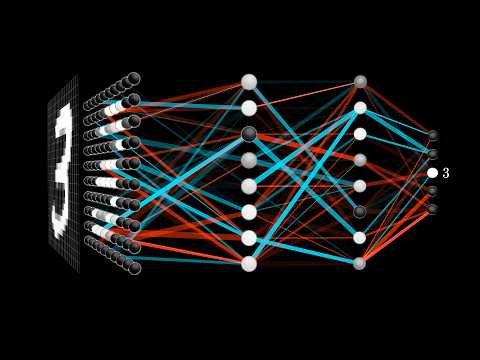

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo("aircAruvnKk", width=600, height=350)

## MLP e MNIST em Pytorch
---

In [12]:
from torchvision import datasets
import torchvision.transforms as transforms
import torch.utils.data as data

# Número de processos para o dataloader
NUM_WORKERS = 0
# Quantas amostras (imagens) por batch
BATCH_SIZE = 128
# Converte dados em tensores
transform = transforms.ToTensor()

# Carrega dados de treino e teste
train_data = datasets.MNIST(root='data', train=True,
    download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
    download=True, transform=transform)

In [13]:
# Cria dataset de validação
VALIDATION_SIZE = 0.1
n_train_examples = int(len(train_data) * VALIDATION_SIZE)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(
    train_data, [n_train_examples, n_valid_examples])

# Data Loaders
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, 
   batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)
valid_loader = torch.utils.data.DataLoader(valid_data,
   batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)
test_loader = torch.utils.data.DataLoader(test_data, 
  batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

## Arquitetura da Rede Neural
---

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.flatten = nn.Flatten()
        # input layer
        self.fc1 = nn.Linear(28 * 28, 64)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(64, 32)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Função de Custo/*Loss* para Classificação
---

- **Cross‑Entropy Loss**: $\mathcal{L}(\mathbf{y},\hat{\mathbf{y}})= -\sum_{k=1}^{K} y_k\,\log(\hat y_k)$
- **Intuição**  
  - Mede a divergência entre o vetor de rótulos reais $y$ (ou $y_k$) e a distribuição predita $\hat{y}$.  
  - Penaliza fortemente previsões que atribuem baixa probabilidade ao verdadeiro rótulo.
- **Propriedades importantes**  
  - **Não‑negatividade**: $\mathcal{L} \ge 0$; zero apenas quando $\hat y = y$.  
  - **Derivada simples**: facilita a implementação do algoritmo de backpropagation.
- **Quando usar**: Binária ou multiclasse quando as saídas são interpretadas como probabilidades (softmax ou sigmoid).

In [15]:
import torch.optim as optim

EPOCHS = 10
device = set_device(on_gpu=True)
model = MLPNet().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

num_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Num. Parâmetros no modelo:", num_parameters)

Num. Parâmetros no modelo: 52650


<div style='align: left; text-align:center;'>
    <img src='https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png' style="width:900px;"/>
    <span style='display:block;'>Pytorch training Loop. Fonte: <a href="https://www.learnpytorch.io" target="_blank">Daniel Bourke</a>.</span>
    <br/>
</div>

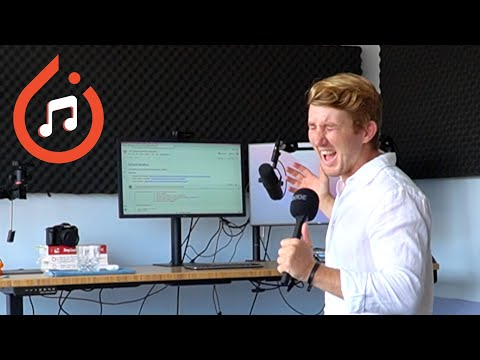

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo("Nutpusq_AFw", width=600, height=350)

In [17]:
from tqdm.notebook import trange

tr_loss = [0.]*EPOCHS
val_loss = [0.]*EPOCHS

with trange(EPOCHS, desc="Training", leave=False) as tepoch:
    for epoch in range(EPOCHS):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for images, labels in train_loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_function(outputs, labels)
            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        avg_epoch_loss = running_loss / len(train_loader)
        tr_loss[epoch] = avg_epoch_loss
        training_accuracy = correct_predictions / total_predictions * 100
        
        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_running_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0

        with torch.no_grad():
            for images, labels in valid_loader:
                images = images.view(-1, 28*28).to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = loss_function(outputs, labels)
                val_running_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total_predictions += labels.size(0)
                val_correct_predictions += (predicted == labels).sum().item()

        avg_val_loss = val_running_loss / len(valid_loader)
        val_loss[epoch] = avg_val_loss
        validation_accuracy = val_correct_predictions / val_total_predictions * 100
        tepoch.set_postfix(train_loss=avg_epoch_loss, train_acc=training_accuracy, val_loss=avg_val_loss, val_acc=validation_accuracy)
        tepoch.update(1)

Training:   0%|          | 0/10 [00:00<?, ?it/s]

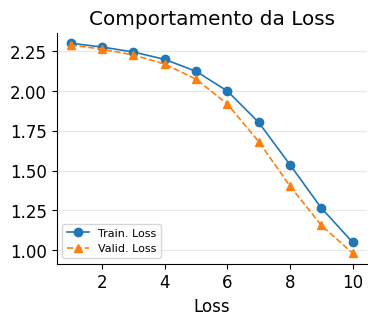

In [18]:
epoch_ticks = [i+1 for i in range(EPOCHS)]
plt.figure(figsize=(4,3))
plt.plot(epoch_ticks, tr_loss, "-o", label="Train. Loss")
plt.plot(epoch_ticks, val_loss, "--^", label="Valid. Loss")
plt.xlabel('Epoch')
plt.xlabel('Loss')
plt.title("Comportamento da Loss")
plt.legend(loc='lower left', fontsize=8)
plt.show()

## Testando o Modelo
---

- Avaliar se o modelo **generaliza** bem para dados que não foram vistos pela rede durante o treinamento (*unseen data*).
- **Importante**: usar `model.eval()` para configurar o modelo em *evaluation mode*.

In [19]:
def get_predictions(model, iterator, device):
    model.eval()
    images, labels, probs = [], [], []
    with torch.no_grad():
        for (x, y) in iterator:
            x = x.view(-1, 28*28).to(device)
            y = y.to(device)
            
            y_pred = model(x)
            y_prob = F.softmax(y_pred, dim=-1)
        
            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())
    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)
    
    return images, labels, probs

## Função de Ativação na Camada de Saída 
---
- Camada de Saída com Softmax: Cabeça de Classificação (*Classification Head*)
- **Propósito principal**: Converter vetores de *logits* (saída da última camada escondida) $z \in \mathbb{R}^{K}$ em uma distribuição de probabilidade sobre $K$ classes.
- **Definição matemática**: $\sigma(z)_k = \frac{\exp(z_k)}{\sum_{j=1}^{K} \exp(z_j)}, \qquad k=1,\dots ,K$
- Cada componente fica no intervalo $(0,1)$ e a soma totaliza $1$.
- **Derivada simples**: $ \frac{\partial \sigma(z)_i}{\partial z_j} = \sigma(z)_i (\delta_{ij} - \sigma(z)_j)$, onde $\delta_{ij}$ é a [função indicadora](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_indicadora).
- Junto com a loss **Cross‑Entropy**, forma o padrão ouro “Softmax + Cross‑Entropy”.

<div style='align: left; text-align:center;'>
    <img src='https://adeveloperdiary.com/assets/img/Understanding-and-implementing-Neural-Network-with-SoftMax-in-Python-from-scratch-adeveloperdiary.com-1.webp' style="width:400px;"/>
    <span style='display:block;'>Função Softmax para classificação. Fonte: <a href="https://adeveloperdiary.com/data-science/deep-learning/neural-network-with-softmax-in-python/" target="_blank">Abhisek Jana</a>.</span>
</div> 

In [20]:
images, labels, probs = get_predictions(model, test_loader, device)
pred_labels = torch.argmax(probs, 1)

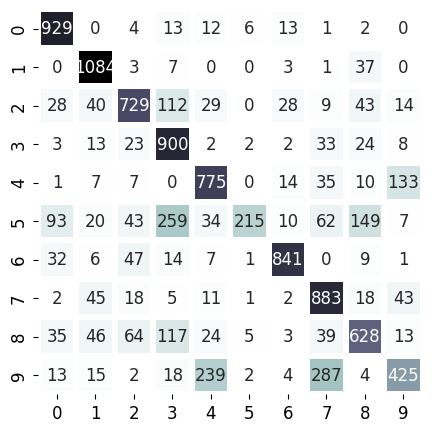

In [21]:
import sklearn.metrics as mtr
import seaborn as sns
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1)
cm = mtr.confusion_matrix(labels, pred_labels)
sns.heatmap(
    cm, annot=True, fmt='d', cmap='bone_r', cbar=False,
    square=True, linewidths=3, linecolor="w", ax=ax)
plt.show()

In [ ]:
import numpy as np

dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.view(-1, 28*28).to(device)
labels = labels.to(device)

output = model(images)
_, preds = torch.max(output, 1)
images = images.cpu()

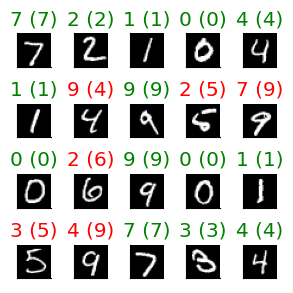

In [22]:
fig = plt.figure(figsize=(3, 3))
for idx in np.arange(20):
    ax = fig.add_subplot(4, int(20/4), idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].view(28,28), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))
plt.tight_layout()
plt.show()

## Salvando o modelo

---

In [23]:
torch.save(model.state_dict(), "mlp-mnist-model.pth")

## Carregando o modelo
---

In [24]:
model = MLPNet()
model.load_state_dict(torch.load("mlp-mnist-model.pth"))
model.eval();

## Resumo

---

<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:65%;">

- **Perceptron**: Modelo linear + função de ativação (step/sigmoid).
- Algoritmo de aprendizagem: ajuste dos pesos com base no erro.
- **Multi‑Layer Perceptron (MLP)**: Estrutura em camadas: entrada → múltiplas camadas ocultas → saída.
- Ativações não‑lineares (ReLU, tanh, sigmoid) permitem modelar funções complexas.
- **Treinamento de Redes Neurais**
  - Função de perda: Cross‑Entropy (classificação) ou MSE (regressão).
  - Otimizadores: SGD, Adam, RMSProp; ajustes de taxa de aprendizado.
  - Backpropagation: cálculo eficiente de gradientes via cadeia da regra (próxima aula).
- **Exercício**: Experimente diferentes arquiteturas (número de camadas, neurônios).
- **Mateiral adicional**: [Perceptron - YouTube](https://www.youtube.com/watch?v=4Gac5I64LM4)

</td>
<td style="vertical-align:middle;text-align:center;border:none;width:35%;">

    
<div style='align:center; text-align:center;'>
    <img src='https://hadrienj.github.io/assets/images/deep-learning-book-goodfellow-cover.jpg' style="width:200px;"/>
    <span style='display:block;'><b>Leitura Recomendada</b>: Capítulo 6.</span>
</div> 

</td>
</tr>
</table>